<a href="https://colab.research.google.com/github/s-choung/Research_utility/blob/main/surface_pourbaix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#subscript = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")
#print("C2H5OH".translate(subscript))

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_excel('test.xlsx')
df

,s,#of N,M,G_Cl,G_O,G_OH,G_OOH,Unnamed: 7,Unnamed: 8
0,p6_1d,3,Ru,-2.58,-1.29,-1.02,NaN,NaN,NaN
1,p6_1d,3,Mn,-2.74,-0.98,-1.07,2.08,NaN,NaN
2,p6_1d,3,Fe,-2.26,-0.72,-0.79,2.13,NaN,NaN
3,p6_1d,3,Co,-2.25,0.33,-0.58,2.42,NaN,NaN
4,p6_1d,3,Ni,-2.30,0.86,-0.53,2.51,NaN,NaN
...,...,...,...,...,...,...,...,...,...
247,p5,0,Pt,NaN,NaN,NaN,NaN,NaN,NaN
248,p5,0,Au,NaN,NaN,NaN,NaN,NaN,NaN
249,p5,0,Cr,NaN,NaN,NaN,NaN,NaN,NaN
250,p5,0,Mo,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
m1 = df.loc[ (df['#of N'] == 3) & (df['s'] == 'p6_1d') , ['s','#of N','M','G_Cl', 'G_O','G_OH','G_OOH']]



In [ ]:
m1.values

array([['Ru', -2.58, -1.29, -1.02, nan],
       ['Mn', -2.74, -0.98, -1.07, 2.08],
       ['Fe', -2.26, -0.72, -0.79, 2.13],
       ['Co', -2.25, 0.33, -0.58, 2.42],
       ['Ni', -2.3, 0.86, -0.53, 2.51],
       ['Cu', -1.73, 1.58, -0.01, 2.91],
       ['Tc', -2.94, -2.16, -1.49, nan],
       ['Rh', -2.15, -0.04, -0.66, 2.16],
       ['Pd', -1.84, 1.5, 0.03, 2.94],
       ['Ag', -1.13, 2.75, 0.83, 3.65],
       ['Re', -3.42, -2.77, -2.07, nan],
       ['Os', -3.21, -2.26, -1.65, nan],
       ['Ir', -3.39, -2.03, -1.81, nan],
       ['Pt', -2.69, -0.23, -0.82, 1.87],
       ['Au', -1.85, 1.41, -0.07, 2.93],
       ['Cr', -3.12, -1.96, -1.8, nan],
       ['Mo', -3.31, -2.28, -1.99, nan],
       ['W', -3.66, -2.74, -2.43, nan]], dtype=object)

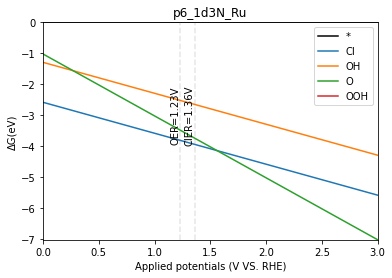

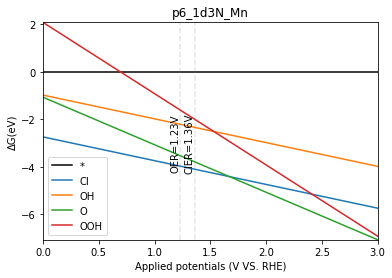

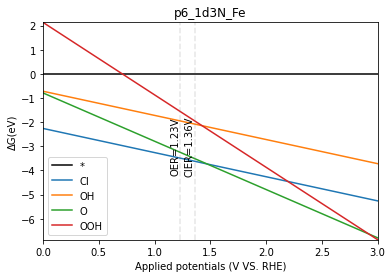

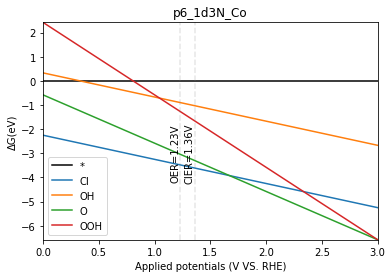

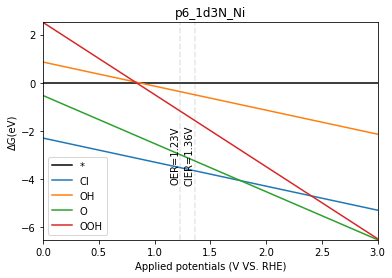

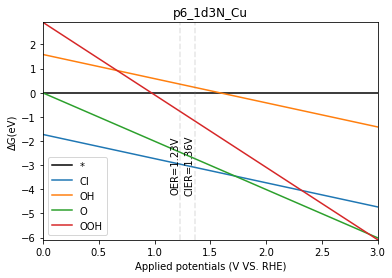

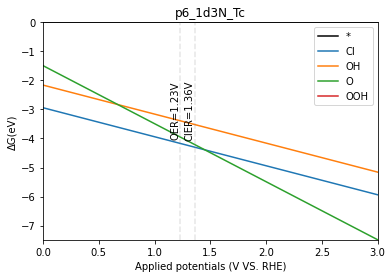

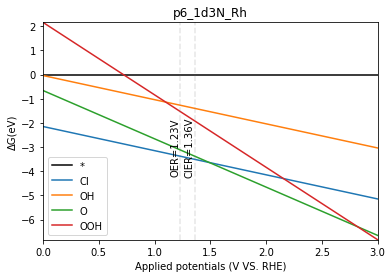

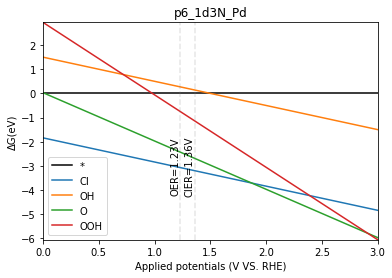

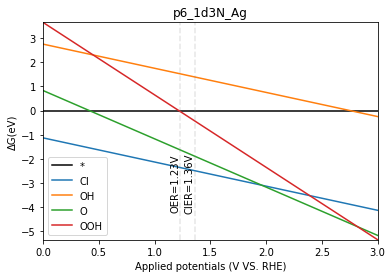

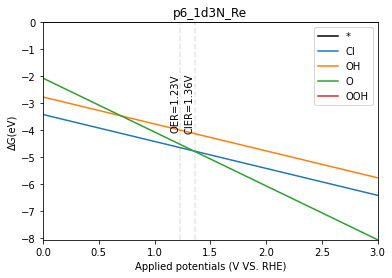

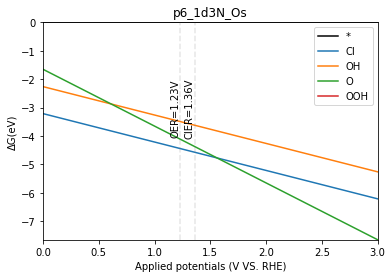

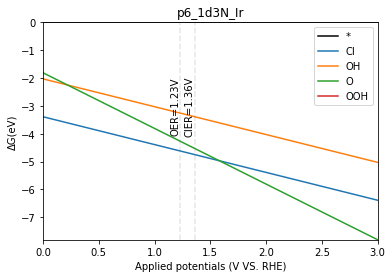

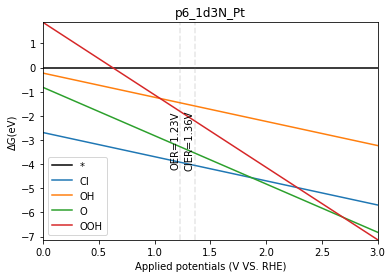

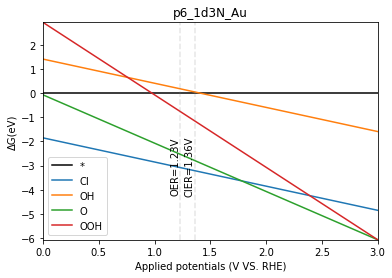

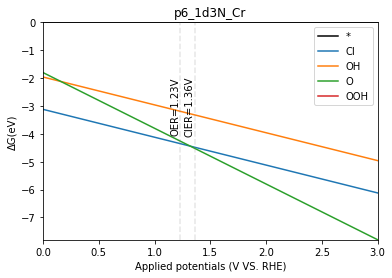

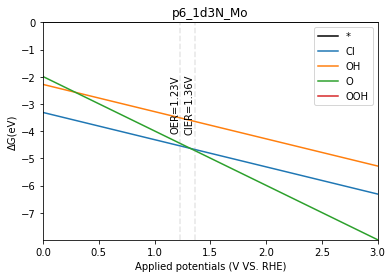

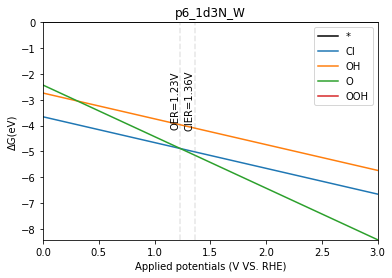

In [ ]:
def surface_pourbaix(cl_at0V,oh_at0V,o_at0V,ooh_at0V,name):
#  name=name.translate(subscript)

  plt.title(name)
  cl=cl_at0V
  oh=oh_at0V
  o=o_at0V
  ooh=ooh_at0V

  # create data
  V = [0,3]
  G_plane = [0,0]
  G_Cl = [cl,cl-3]
  G_oh = [oh,oh-3]
  G_o = [o,o-6]
  G_ooh = [ooh,ooh-9]

    # plot lines
  plt.plot(V,G_plane, label = "*",c='black')
  plt.plot(V,G_Cl, label = "Cl")
  plt.plot(V,G_oh, label = "OH")
  plt.plot(V, G_o, label = "O")
  plt.plot(V, G_ooh, label = "OOH")
  plt.axvline(x=1.23, linestyle='dashed', alpha=0.2,c='gray')
  plt.axvline(x=1.36, linestyle='dashed', alpha=0.2,c='gray')

  th1 = plt.text(1.23, -3, 'OER=1.23V', fontsize=10,rotation=90, rotation_mode='anchor',horizontalalignment='center',multialignment='center',verticalalignment='bottom')
  th1 = plt.text(1.36, -3, 'ClER=1.36V', fontsize=10,rotation=90, rotation_mode='anchor',horizontalalignment='center',multialignment='center',verticalalignment='bottom')

  plt.ylabel('ΔG(eV)')
  plt.xlabel('Applied potentials (V VS. RHE)')
  plt.margins(x=0,y=0)

  plt.legend()
  plt.show()
    


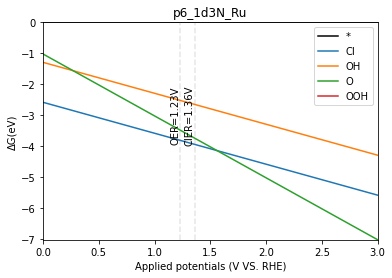

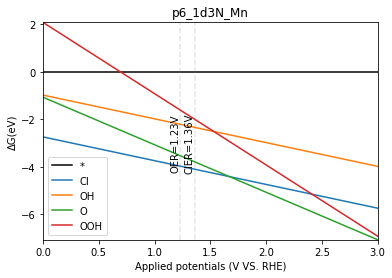

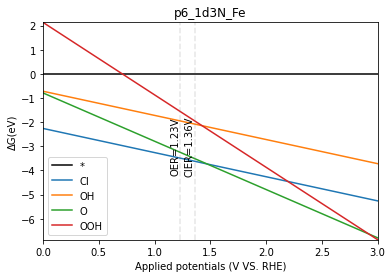

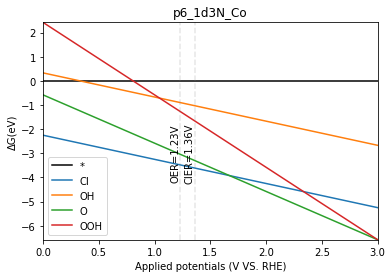

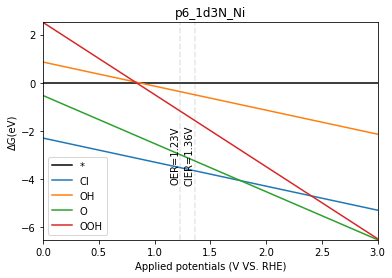

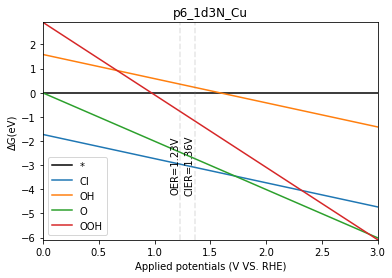

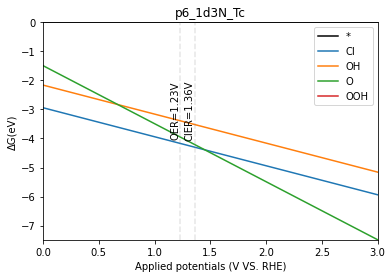

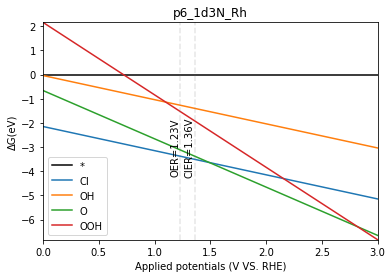

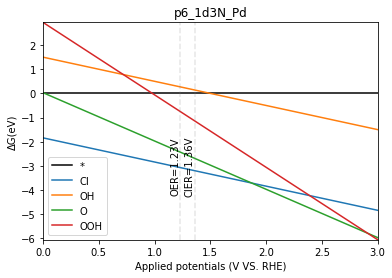

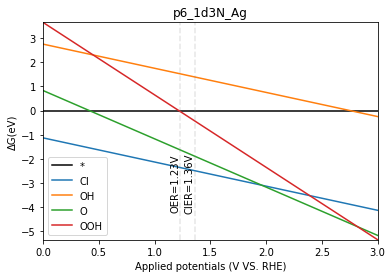

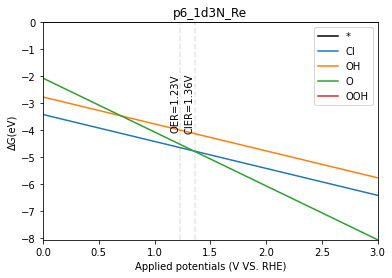

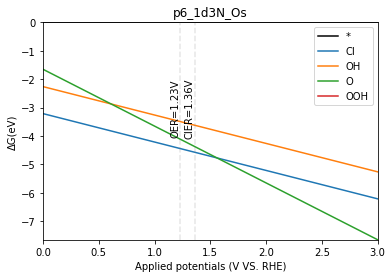

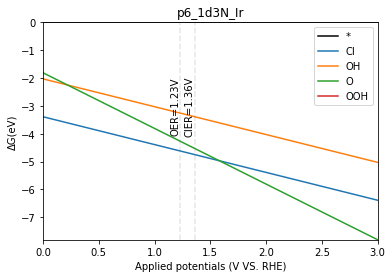

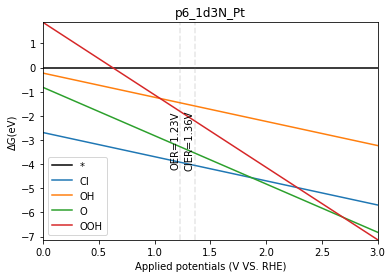

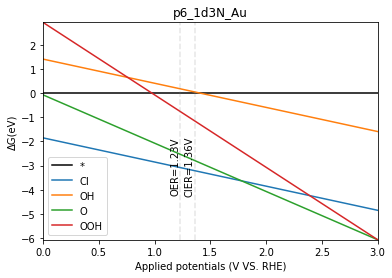

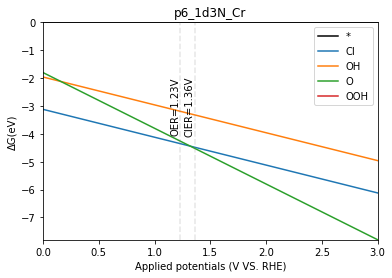

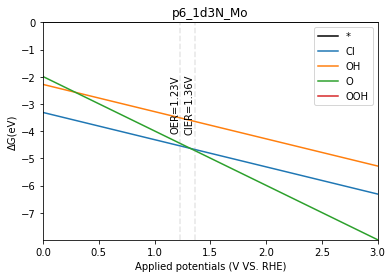

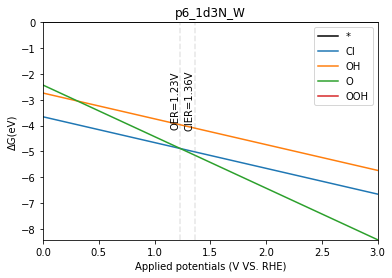

In [ ]:
for i in m1.values :
    surface_pourbaix(i[3],i[4],i[5],i[6],i[0]+str(i[1])+'N_'+i[2])


In [ ]:
def surface_pourbaix(cl_at0V,oh_at0V,o_at0V,ooh_at0V,name):
#  name=name.translate(subscript)

  plt.title(name)
  cl=cl_at0V
  oh=oh_at0V
  o=o_at0V
  ooh=ooh_at0V
    
    
  
  # create data
  V = np.arange(0,3,0.01)
  G_plane = [0] * len(V)
  G_Cl = -V+cl
  G_oh = -V+oh
  G_o = -2*V+o
  if np.isnan(ooh):
    G_ooh = G_plane
  else :
    G_ooh = -3*V+ooh
  G = np.array([G_plane,G_Cl,G_oh,G_o,G_ooh])
  G_min = np.min(G, axis = 0)

  fi = []
    
  for i in range(len(G_min)) :
    if G_min[i] == G_plane[i] :
      fi.append(0)
    if G_min[i] == G_Cl[i] :
      fi.append(1)
    if G_min[i] == G_oh[i] :
      fi.append(2)
    if G_min[i] == G_o[i] :
      fi.append(3)
    if G_min[i] == G_ooh[i] :
      fi.append(4)

  #print(fi)
  x = []
  temp = fi[0]
  for i in range(len(fi)) :
    if temp != fi[i] :
        x.append([i,fi[i-1]])
    temp = fi[i]
    
  x.append([len(fi),fi[-1]])
    

  #print(x)


    # plot lines
  plt.plot(V,G_plane, label = "*",c='black')
  plt.plot(V,G_Cl, label = "Cl")
  plt.plot(V,G_oh, label = "OH")
  plt.plot(V, G_o, label = "O")
  plt.plot(V, G_ooh, label = "OOH")
  plt.axvline(x=1.23, linestyle='dashed', alpha=0.2,c='gray')
  plt.axvline(x=1.36, linestyle='dashed', alpha=0.2,c='gray')


  temp2 = 0

  for i in x :
    if i[1] == 0 :
      c = 'black'
    if i[1] == 1 :
      c = 'blue'
    if i[1] == 2 :
      c = 'orange'
    if i[1] == 3 :
      c = 'green'
    if i[1] == 4 :
      c = 'red'
    
    plt.fill_between(V[temp2:i[0]],G_min[temp2:i[0]],np.min(G_min), color = c)
    temp2 = i[0]
    


    

  #plt.fill_between(V,G_min, np.min(G_min), color = 'gray')

  th1 = plt.text(1.23, -3, 'OER=1.23V', fontsize=10,rotation=90, rotation_mode='anchor',horizontalalignment='center',multialignment='center',verticalalignment='bottom')
  th1 = plt.text(1.36, -3, 'ClER=1.36V', fontsize=10,rotation=90, rotation_mode='anchor',horizontalalignment='center',multialignment='center',verticalalignment='bottom')

  plt.ylabel('ΔG(eV)')
  plt.xlabel('Applied potentials (V VS. RHE)')
  plt.margins(x=0,y=0)

  plt.legend()
  plt.show()


In [ ]:
m2 = df.loc[ (df['#of N'] == 4) & (df['s'] == 'p6_2d') ,  ['s','#of N','M','G_Cl', 'G_O','G_OH','G_OOH']]
m2


,s,#of N,M,G_Cl,G_O,G_OH,G_OOH
72,p6_2d,4,Ru,-1.70,0.35,-0.03,2.64
73,p6_2d,4,Mn,-1.13,0.92,0.45,3.41
74,p6_2d,4,Fe,-1.00,1.23,0.52,3.31
75,p6_2d,4,Co,-0.75,2.51,1.01,3.79
76,p6_2d,4,Ni,0.07,3.92,2.03,4.71
77,p6_2d,4,Cu,-0.12,3.94,1.87,4.62
78,p6_2d,4,Tc,-1.81,-1.47,-0.66,-0.16
79,p6_2d,4,Rh,-0.77,2.54,1.03,3.87
80,p6_2d,4,Pd,0.33,4.79,2.67,5.20
81,p6_2d,4,Ag,-0.52,3.57,1.49,4.28


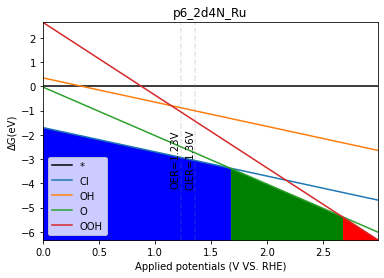

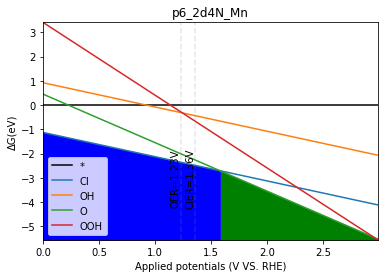

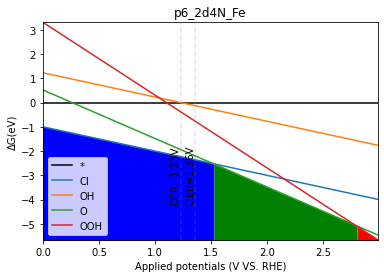

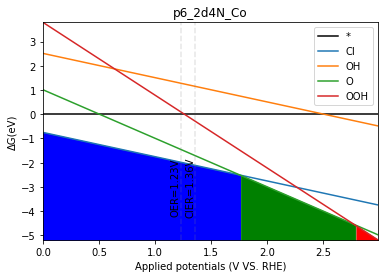

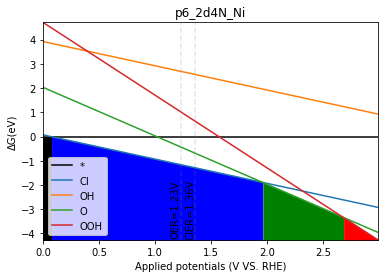

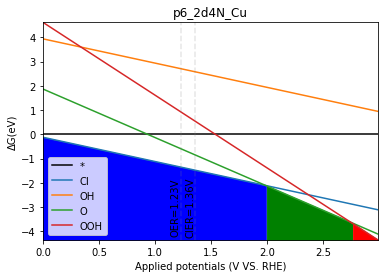

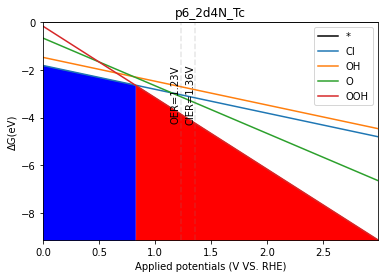

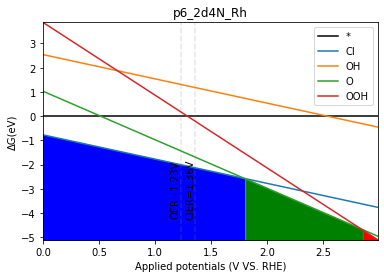

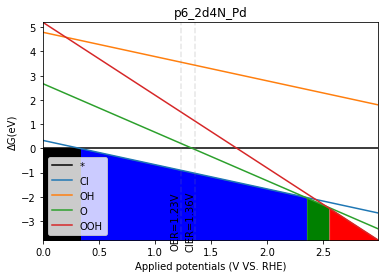

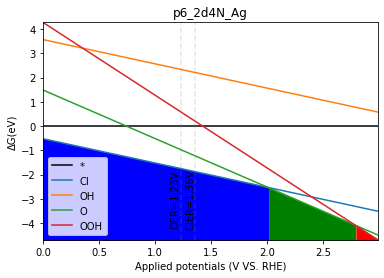

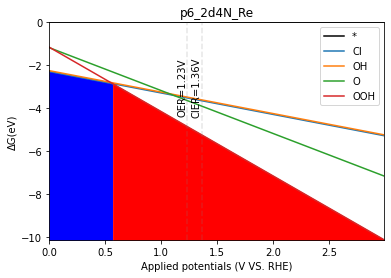

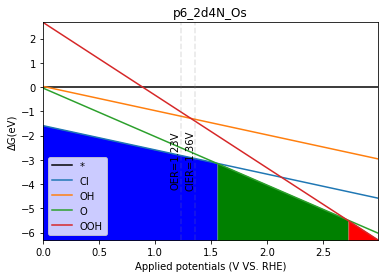

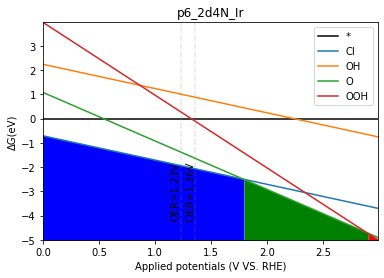

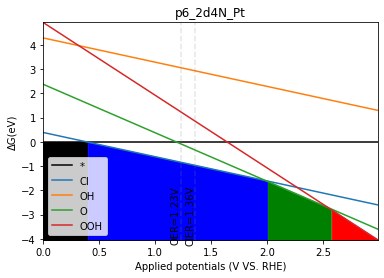

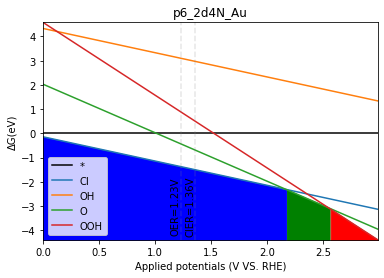

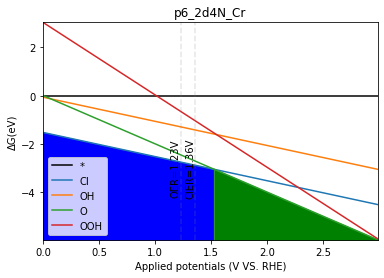

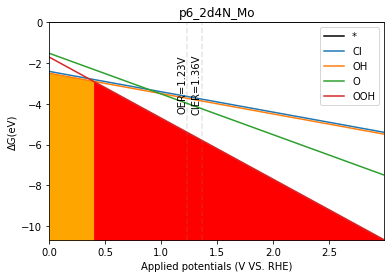

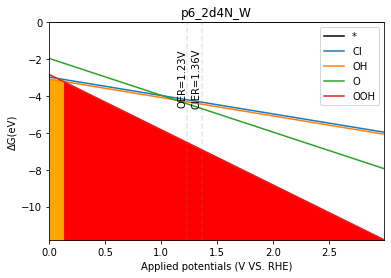

In [ ]:
for i in m2.values :
    surface_pourbaix(i[3],i[4],i[5],i[6],i[0]+str(i[1])+'N_'+i[2])

In [ ]:
#Cl volcano plot

def cl_volcano(name,G_Cl) :
  UL = list()
  for i in range(len(G_Cl)) :
    if G_Cl[i] > 0 :
      ul = 1.36/2 - G_Cl[i]
      UL.append(ul)
    else :
      ul = 1.36/2 + G_Cl[i]
      UL.append(ul)
    
  plt.scatter(G_Cl, UL)


In [ ]:
m3 = df.loc[ (df['s'] == 'p6_2d'), ['s','#of N','M','G_Cl']]
list(m3['G_Cl'])

[-1.7,
 -1.13,
 -1.0,
 -0.75,
 0.07,
 -0.12,
 -1.81,
 -0.77,
 0.33,
 -0.52,
 -2.29,
 -1.59,
 -0.71,
 0.39,
 -0.14,
 -1.52,
 -2.41,
 -2.97,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

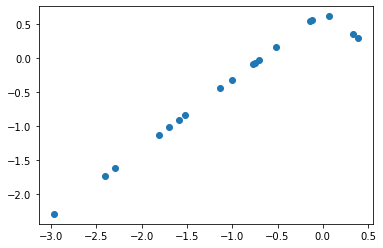

In [ ]:
cl_volcano('volcano',list(m3['G_Cl']))